In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

In [12]:
apple_training_complete = pd.read_csv('AAPL_train.csv')

In [13]:
apple_training_complete

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-12-31,72.932854,76.485718,72.714287,76.024284,66.936584,164873100
1,2013-01-02,79.117142,79.285713,77.375717,78.432854,69.057251,140129500
2,2013-01-03,78.268570,78.524284,77.285713,77.442856,68.185600,88241300
3,2013-01-04,76.709999,76.947144,75.118568,75.285713,66.286301,148583400
4,2013-01-07,74.571426,75.614288,73.599998,74.842857,65.896370,121039100
...,...,...,...,...,...,...,...
1255,2017-12-22,174.679993,175.419998,174.500000,175.009995,170.379120,16349400
1256,2017-12-26,170.800003,171.470001,169.679993,170.570007,166.056595,33185500
1257,2017-12-27,170.100006,170.779999,169.710007,170.600006,166.085815,21498200
1258,2017-12-28,171.000000,171.850006,170.479996,171.080002,166.553101,16480200


In [14]:
apple_training_processed = apple_training_complete.iloc[:, 1:2].values

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))

apple_training_scaled = scaler.fit_transform(apple_training_processed)

In [16]:
features_set = []
labels = []
for i in range(60, 1260):
    features_set.append(apple_training_scaled[i-60:i, 0])
    labels.append(apple_training_scaled[i, 0])

In [17]:
features_set

[array([0.14628787, 0.19795893, 0.19086893, 0.17784673, 0.15997849,
        0.16858435, 0.16057534, 0.16779659, 0.15878493, 0.13691814,
        0.13169014, 0.12732155, 0.1460253 , 0.13195271, 0.1391621 ,
        0.14423488, 0.08597518, 0.07605635, 0.059513  , 0.08418477,
        0.08239435, 0.08237052, 0.08491287, 0.07870612, 0.06693722,
        0.08176175, 0.0898544 , 0.10268561, 0.10566959, 0.10926234,
        0.09458105, 0.09137026, 0.09653853, 0.08728814, 0.08321794,
        0.06926475, 0.07314397, 0.07863453, 0.0666627 , 0.07216522,
        0.06693722, 0.05971593, 0.04754117, 0.03999762, 0.05555025,
        0.04360229, 0.0499284 , 0.0498687 , 0.05685129, 0.04831701,
        0.05354501, 0.05963236, 0.06383384, 0.08537839, 0.08289565,
        0.07430177, 0.07950586, 0.09157316, 0.0924684 , 0.08174982]),
 array([0.19795893, 0.19086893, 0.17784673, 0.15997849, 0.16858435,
        0.16057534, 0.16779659, 0.15878493, 0.13691814, 0.13169014,
        0.12732155, 0.1460253 , 0.13195271, 0.

In [18]:
labels

[0.07382431562530256,
 0.06437096524008734,
 0.04730243705357828,
 0.05180234750655088,
 0.054655043837102846,
 0.043602287875374235,
 0.04402004031976592,
 0.045822402447944666,
 0.04789925848711363,
 0.05460729377770779,
 0.05512053798567362,
 0.04658629478045906,
 0.04010502840710772,
 0.038553339469125425,
 0.02031509775414725,
 0.0,
 0.005574107152219565,
 0.019121496663156545,
 0.00664837069319435,
 0.027763187946030277,
 0.026068265540294455,
 0.03876819384836361,
 0.05625447447926435,
 0.06742659305665677,
 0.06422772341711791,
 0.0756027484148799,
 0.08085458653106603,
 0.0919073759136585,
 0.084829296461988,
 0.08574837022112458,
 0.08355215992150777,
 0.07584147364620752,
 0.07863453044500768,
 0.06110050810992773,
 0.04209834064157114,
 0.0609691975353952,
 0.05244686886818539,
 0.059894959060068254,
 0.06693721970078059,
 0.05726904000197519,
 0.06311769955169677,
 0.07391980738887682,
 0.062103125673769966,
 0.06884699648575443,
 0.07702317690962535,
 0.07491046863863415,

In [19]:
features_set, labels = np.array(features_set), np.array(labels)

In [20]:
features_set

array([[0.14628787, 0.19795893, 0.19086893, ..., 0.09157316, 0.0924684 ,
        0.08174982],
       [0.19795893, 0.19086893, 0.17784673, ..., 0.0924684 , 0.08174982,
        0.07382432],
       [0.19086893, 0.17784673, 0.15997849, ..., 0.08174982, 0.07382432,
        0.06437097],
       ...,
       [0.8257937 , 0.82370489, 0.82052999, ..., 0.99214607, 0.99640719,
        0.96398904],
       [0.82370489, 0.82052999, 0.82512526, ..., 0.99640719, 0.96398904,
        0.95814041],
       [0.82052999, 0.82512526, 0.83172595, ..., 0.96398904, 0.95814041,
        0.96566005]])

In [21]:
labels

array([0.07382432, 0.06437097, 0.04730244, ..., 0.95814041, 0.96566005,
       0.96164958])

In [22]:
features_set = np.reshape(features_set, (features_set.shape[0], features_set.shape[1], 1))

In [23]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

Using TensorFlow backend.


In [24]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(features_set.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50))
model.add(Dropout(0.2))

model.add(Dense(units = 1))





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [25]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [26]:
model.fit(features_set, labels, epochs = 100, batch_size = 32)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/100
1200/1200 [==============================] - 13s 11ms/step - loss: 0.0497
Epoch 2/100
1200/1200 [==============================] - 9s 7ms/step - loss: 0.0052
Epoch 3/100
1200/1200 [==============================] - 9s 8ms/step - loss: 0.0042
Epoch 4/100
1200/1200 [==============================] - 9s 7ms/step - loss: 0.0047
Epoch 5/100
1200/1200 [==============================] - 9s 7ms/step - loss: 0.0038
Epoch 6/100
1200/1200 [==============================] - 9s 7ms/step - loss: 0.0040
Epoch 7/100
1200/1200 [==============================] - 8s 7ms/step - loss: 0.0041
Epoch 8/100
1200/1200 [==============================] - 8s 7ms/step - loss: 0.0039
Epoch 9/100
1200/1200 [==============================] - 8s 7ms/step - loss: 0.0036
Epoch 10/100
1200/1200 [==============================] - 9s 8ms/step - loss: 0.0037
Epoch 11/100
1200/1200 [==============================] - 8s 7

1200/1200 [==============================] - 11s 9ms/step - loss: 0.0013
Epoch 91/100
1200/1200 [==============================] - 10s 8ms/step - loss: 0.0013
Epoch 92/100
1200/1200 [==============================] - 10s 8ms/step - loss: 0.0013
Epoch 93/100
1200/1200 [==============================] - 10s 9ms/step - loss: 0.0014
Epoch 94/100
1200/1200 [==============================] - 11s 9ms/step - loss: 0.0012
Epoch 95/100
1200/1200 [==============================] - 11s 9ms/step - loss: 0.0013
Epoch 96/100
1200/1200 [==============================] - 11s 9ms/step - loss: 0.0013
Epoch 97/100
1200/1200 [==============================] - 10s 9ms/step - loss: 0.0012
Epoch 98/100
1200/1200 [==============================] - 10s 9ms/step - loss: 0.0011
Epoch 99/100
1200/1200 [==============================] - 10s 9ms/step - loss: 0.0011
Epoch 100/100
1200/1200 [==============================] - 10s 9ms/step - loss: 0.0013


In [27]:
apple_testing_complete = pd.read_csv('AAPL_real.csv')
apple_testing_processed = apple_testing_complete.iloc[:, 1:2].values

In [28]:
apple_total = pd.concat((apple_training_complete['Open'], apple_testing_complete['Open']), axis=0)

In [47]:
apple_training_complete

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-12-31,72.932854,76.485718,72.714287,76.024284,66.936584,164873100
1,2013-01-02,79.117142,79.285713,77.375717,78.432854,69.057251,140129500
2,2013-01-03,78.268570,78.524284,77.285713,77.442856,68.185600,88241300
3,2013-01-04,76.709999,76.947144,75.118568,75.285713,66.286301,148583400
4,2013-01-07,74.571426,75.614288,73.599998,74.842857,65.896370,121039100
...,...,...,...,...,...,...,...
1255,2017-12-22,174.679993,175.419998,174.500000,175.009995,170.379120,16349400
1256,2017-12-26,170.800003,171.470001,169.679993,170.570007,166.056595,33185500
1257,2017-12-27,170.100006,170.779999,169.710007,170.600006,166.085815,21498200
1258,2017-12-28,171.000000,171.850006,170.479996,171.080002,166.553101,16480200


In [46]:
apple_total

0      72.932854
1      79.117142
2      78.268570
3      76.709999
4      74.571426
         ...    
15    177.250000
16    174.509995
17    172.000000
18    170.160004
19    165.529999
Name: Open, Length: 1280, dtype: float64

In [42]:
len(apple_total)

1280

In [41]:
apple_testing_complete

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,170.160004,172.300003,169.259995,172.259995,167.701889,25555900
1,2018-01-03,172.529999,174.550003,171.960007,172.229996,167.672668,29517900
2,2018-01-04,172.539993,173.470001,172.080002,173.029999,168.451508,22434600
3,2018-01-05,173.440002,175.369995,173.050003,175.000000,170.369385,23660000
4,2018-01-08,174.350006,175.610001,173.929993,174.350006,169.736588,20567800
5,2018-01-09,174.550003,175.059998,173.410004,174.330002,169.717117,21584000
6,2018-01-10,173.160004,174.300003,173.000000,174.289993,169.678162,23959900
7,2018-01-11,174.589996,175.490005,174.490005,175.279999,170.641968,18667700
8,2018-01-12,176.179993,177.360001,175.649994,177.089996,172.404099,25418100
9,2018-01-16,177.899994,179.389999,176.139999,176.190002,171.527893,29565900


In [29]:
test_inputs = apple_total[len(apple_total) - len(apple_testing_complete) - 60:].values
test_inputs

array([154.179993, 154.970001, 155.809998, 156.059998, 155.970001,
       156.350006, 156.729996, 157.899994, 159.779999, 160.419998,
       156.75    , 156.610001, 156.889999, 156.289993, 156.910004,
       157.229996, 159.289993, 163.889999, 167.899994, 169.869995,
       166.600006, 174.      , 172.369995, 173.910004, 174.660004,
       175.110001, 175.110001, 173.5     , 173.039993, 169.970001,
       171.179993, 171.039993, 170.289993, 170.779999, 173.360001,
       175.100006, 175.050003, 174.300003, 172.630005, 170.429993,
       169.949997, 172.479996, 169.059998, 167.5     , 169.029999,
       170.490005, 169.199997, 172.149994, 172.5     , 172.399994,
       173.630005, 174.880005, 175.029999, 174.869995, 174.169998,
       174.679993, 170.800003, 170.100006, 171.      , 170.520004,
       170.160004, 172.529999, 172.539993, 173.440002, 174.350006,
       174.550003, 173.160004, 174.589996, 176.179993, 177.899994,
       176.149994, 179.369995, 178.610001, 177.300003, 177.300

In [44]:
len(apple_total)

1280

In [43]:
len(test_inputs)

80

In [31]:
test_inputs = test_inputs.reshape(-1,1)
test_inputs

array([[154.179993],
       [154.970001],
       [155.809998],
       [156.059998],
       [155.970001],
       [156.350006],
       [156.729996],
       [157.899994],
       [159.779999],
       [160.419998],
       [156.75    ],
       [156.610001],
       [156.889999],
       [156.289993],
       [156.910004],
       [157.229996],
       [159.289993],
       [163.889999],
       [167.899994],
       [169.869995],
       [166.600006],
       [174.      ],
       [172.369995],
       [173.910004],
       [174.660004],
       [175.110001],
       [175.110001],
       [173.5     ],
       [173.039993],
       [169.970001],
       [171.179993],
       [171.039993],
       [170.289993],
       [170.779999],
       [173.360001],
       [175.100006],
       [175.050003],
       [174.300003],
       [172.630005],
       [170.429993],
       [169.949997],
       [172.479996],
       [169.059998],
       [167.5     ],
       [169.029999],
       [170.490005],
       [169.199997],
       [172.1

In [32]:
test_inputs = scaler.transform(test_inputs)

In [33]:
test_features = []
for i in range(60, 80):
    test_features.append(test_inputs[i-60:i, 0])

In [34]:
test_features

[array([0.82512526, 0.83172595, 0.83874431, 0.84083311, 0.84008117,
        0.84325619, 0.84643109, 0.85620667, 0.87191452, 0.87726185,
        0.84659823, 0.8454285 , 0.84776795, 0.84275477, 0.84793509,
        0.8506087 , 0.86782042, 0.90625446, 0.93975883, 0.95621862,
        0.92889715, 0.9907257 , 0.97710666, 0.98997377, 0.99624018,
        1.        , 1.        , 0.98654809, 0.98270464, 0.95705419,
        0.96716393, 0.9659942 , 0.95972779, 0.9638219 , 0.98537837,
        0.99991649, 0.9994987 , 0.99323229, 0.9792791 , 0.96089752,
        0.95688705, 0.97802574, 0.94945092, 0.9364168 , 0.94920027,
        0.96139894, 0.95062064, 0.9752685 , 0.97819288, 0.97735731,
        0.98763431, 0.99807833, 0.99933157, 0.9979947 , 0.99214607,
        0.99640719, 0.96398904, 0.95814041, 0.96566005, 0.96164958]),
 array([0.83172595, 0.83874431, 0.84083311, 0.84008117, 0.84325619,
        0.84643109, 0.85620667, 0.87191452, 0.87726185, 0.84659823,
        0.8454285 , 0.84776795, 0.84275477, 0.

In [35]:
test_features = np.array(test_features)
test_features = np.reshape(test_features, (test_features.shape[0], test_features.shape[1], 1))

In [36]:
predictions = model.predict(test_features)

In [37]:
predictions

array([[0.98829335],
       [0.98450094],
       [0.9864195 ],
       [0.99231225],
       [1.0002868 ],
       [1.0089223 ],
       [1.0164063 ],
       [1.0195074 ],
       [1.0205052 ],
       [1.0229602 ],
       [1.029161  ],
       [1.0345929 ],
       [1.041697  ],
       [1.0483146 ],
       [1.0510001 ],
       [1.049974  ],
       [1.047026  ],
       [1.0402033 ],
       [1.0282598 ],
       [1.012548  ]], dtype=float32)

In [38]:
predictions = scaler.inverse_transform(predictions)

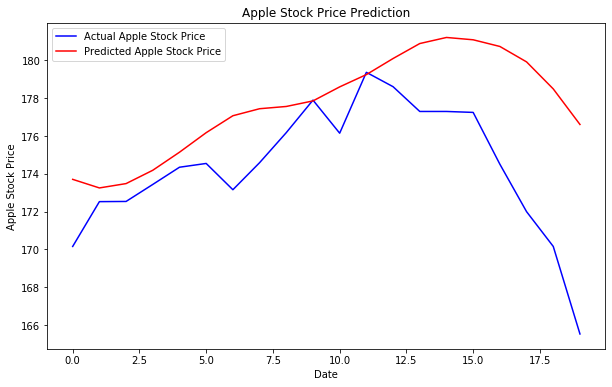

In [39]:
plt.figure(figsize=(10,6))
plt.plot(apple_testing_processed, color='blue', label='Actual Apple Stock Price')
plt.plot(predictions , color='red', label='Predicted Apple Stock Price')
plt.title('Apple Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Apple Stock Price')
plt.legend()
plt.show()